## Chapter 2

In [5]:
import nltk
from nltk.corpus import *
from nltk.book import *
import string
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from nltk.util import ngrams

◑ Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females

In [2]:
names_female = names.words("female.txt")
names_male = names.words("male.txt")

In [3]:
print("Female names {} \nMale names {}".format(names_female[:10], names_male[:10]))

Female names ['Abagael', 'Abagail', 'Abbe', 'Abbey', 'Abbi', 'Abbie', 'Abby', 'Abigael', 'Abigail', 'Abigale'] 
Male names ['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel', 'Abdul', 'Abdulkarim']


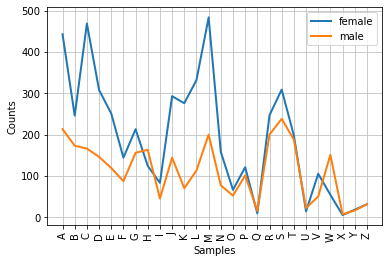

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
nltk.ConditionalFreqDist(
    (gender, name[0])
    for gender in ["female", "male"]
    for name in names.words(gender + ".txt")
).plot()

◑ Pick a pair of texts and study the differences between them, in terms of vocabulary, vocabulary richness, genre, etc. Can you find pairs of words which have quite different meanings across the two texts, such as monstrous in Moby Dick and in Sense and Sensibility?

In [20]:
genesis = text3
monty = text6
gen_len = len(genesis)
mon_len = len(monty)
gen_vocab = set([w.lower() for w in genesis])
mon_vocab = set([w.lower() for w in monty])

In [21]:
print("Length comparison")
print("Genesis {:>8}".format(gen_len))
print("Monty {:>10}".format(mon_len))

Length comparison
Genesis    44764
Monty      16967


In [30]:
print("Vocab size")
print("Genesis {:>8}".format(len(gen_vocab)))
print("Monty {:>10} \n".format(len(mon_vocab)))
print("We can see that Genesis has poor vocab compared to Monty Python.\n\
The vocab/length ration for Genesis is {} and for Monty {}".format((len(gen_vocab)/gen_len), (len(mon_vocab)/mon_len)))

Vocab size
Genesis     2628
Monty       1855 

We can see that Genesis has poor vocab compared to Monty Python.
The vocab/length ration for Genesis is 0.05870789026896613 and for Monty 0.10932987564095008


◑ Read the BBC News article: UK's Vicky Pollards 'left behind' http://news.bbc.co.uk/1/hi/education/6173441.stm. The article gives the following statistic about teen language: "the top 20 words used, including yeah, no, but and like, account for around a third of all words." How many word types account for a third of all word tokens, for a variety of text sources? What do you conclude about this statistic? Read more about this on LanguageLog, at http://itre.cis.upenn.edu/~myl/languagelog/archives/003993.html.

In [31]:
news = brown.words(categories = "news")
fiction = brown.words(categories = "fiction")
humor = brown.words(categories = "humor")

In [45]:
news_freq = nltk.FreqDist(news)
int(len(nltk.FreqDist(news)) * 0.3)

4318

4318 words are quite a lot to print here, so I will print 20 most common for each genre

In [56]:
news_20 = [w for (w, f) in news_freq.most_common(20)]
fiction_20 = [w for (w, f) in nltk.FreqDist(fiction).most_common(20)]
humor_20 = [w for (w, f) in nltk.FreqDist(humor).most_common(20)]

In [60]:
print("Most frequent words in \n\nnews {} \nfiction{} \nhumor{}".format(news_20, fiction_20, humor_20))

Most frequent words in 

news ['the', ',', '.', 'of', 'and', 'to', 'a', 'in', 'for', 'The', 'that', '``', 'is', 'was', "''", 'on', 'at', 'with', 'be', 'by'] 
fiction[',', '.', 'the', 'and', 'to', 'of', 'a', 'was', 'in', 'he', 'his', 'had', '``', "''", '?', 'that', 'I', 'He', 'with', 'it'] 
humor[',', 'the', '.', 'of', 'and', 'a', 'to', '``', "''", 'in', 'was', 'that', 'I', 'it', '?', 'for', 'had', 'he', 'his', 'you']


Taking only 20 most frequent words, gives us either a punctuation or a stop word, unsurprisingly. I will try it out with some preprocessing now.

In [242]:
news_clean = [w.lower() for w in news if w.lower() not in stopwords.words("english") and w not in string.punctuation]
fiction_clean = [w.lower() for w in fiction if w.lower() not in stopwords.words("english") and w not in string.punctuation]
humor_clean = [w.lower() for w in humor if w.lower() not in stopwords.words("english") and w not in string.punctuation]

In [246]:
nltk.FreqDist(news_clean).most_common(20)

[('``', 732),
 ("''", 702),
 ('said', 406),
 ('--', 300),
 ('mrs.', 253),
 ('would', 246),
 ('new', 241),
 ('one', 213),
 ('last', 177),
 ('two', 174),
 ('mr.', 170),
 ('first', 158),
 ('state', 153),
 ('year', 142),
 ('president', 142),
 ('home', 132),
 ('also', 129),
 ('made', 107),
 ('time', 103),
 ('years', 102)]

◑ Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

In [98]:
cfd = nltk.ConditionalFreqDist(
         (genre, word)
         for genre in brown.categories()
         for word in brown.words(categories=genre) if word in pronouns)
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
pronouns = ['I', 'you', 'he', 'she', 'we', 'they']
cfd.tabulate(conditions=genres, samples=pronouns)

                   I  you   he  she   we they 
           news  179   55  451   42   77  205 
       religion  155  100  137   10  176  115 
        hobbies  154  383  155   21  100  177 
science_fiction   98   81  139   36   30   53 
        romance  951  456  702  496   78  168 
          humor  239  131  146   58   32   70 


◑ The CMU Pronouncing Dictionary contains multiple pronunciations for certain words. How many distinct words does it contain? What fraction of words in this dictionary have more than one possible pronunciation?

In [127]:
all_pron = len(cmudict.entries())
vocab_cmu = [w.lower() for (w, phone) in cmudict.entries()]

In [128]:
print("The count of words that have more than one pronunciation in CMU is {}".format(all_pron - len(set(vocab_cmu))))

The count of words that have more than one pronunciation in CMU is 10282


In [139]:
from collections import Counter
word_occur = Counter(vocab_cmu)

In [147]:
# Let's see what are the 5 words with most possible pronunciations
most_pron_5 = sorted(word_occur, key = word_occur.get, reverse = True)[:5]

In [170]:
for w in most_pron_5:
    print("\n\nThe word {} has {} pronunciations\n".format(w, word_occur[w]))
    print(*[pron for pron in cmudict.dict()[w]], sep = "\n")



The word february has 5 pronunciations

['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0']
['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0']
['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0']
['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0']
['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0']


The word february's has 5 pronunciations

['F', 'EH1', 'B', 'Y', 'AH0', 'W', 'EH2', 'R', 'IY0', 'Z']
['F', 'EH1', 'B', 'AH0', 'W', 'EH2', 'R', 'IY0', 'Z']
['F', 'EH1', 'B', 'R', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z']
['F', 'EH1', 'B', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z']
['F', 'EH1', 'B', 'Y', 'UW0', 'W', 'EH2', 'R', 'IY0', 'Z']


The word abkhazian has 4 pronunciations

['AE0', 'B', 'K', 'HH', 'AA1', 'Z', 'IY0', 'AH0', 'N']
['AE0', 'B', 'K', 'HH', 'AE1', 'Z', 'IY0', 'AH0', 'N']
['AE0', 'B', 'K', 'HH', 'AA1', 'Z', 'Y', 'AH0', 'N']
['AE0', 'B', 'K', 'HH', 'AE1', 'Z', 'Y', 'AH0', 'N']


The word activists has 4 pronunciations

['AE1', 'K', 'T', 'AH0', 'V', 'AH0', 'S', 'T', 'S']
['AE1', 'K', 'T

◑ What percentage of noun synsets have no hyponyms? You can get all noun synsets using wn.all_synsets('n').

In [177]:
no_hypo_syn = [syn for syn in wordnet.all_synsets('n') if len(syn.hyponyms()) == 0]

In [189]:
print(len(no_hypo_syn)) # Count of words with no hyponyms is 65422
no_hypo_syn[:5]         # firts five examples

65422


[Synset('congener.n.03'),
 Synset('benthos.n.02'),
 Synset('dwarf.n.03'),
 Synset('heterotroph.n.01'),
 Synset('parent.n.02')]

◑ Define a function supergloss(s) that takes a synset s as its argument and returns a string consisting of the concatenation of the definition of s, and the definitions of all the hypernyms and hyponyms of s

In [202]:
def supergloss(synset):
    hypos = synset.hyponyms()
    hypers = synset.hypernyms()
    return {"definition" : synset.definition(), 
            "hypo_def" : [(hypo.lemma_names()[0], hypo.definition()) for hypo in hypos], 
            "hyper_def" :[(hyper.lemma_names()[0], hyper.definition()) for hyper in hypers]}

In [208]:
car_gloss = supergloss(wordnet.synset("car.n.01"))
print(car_gloss["definition"])   # definition of the synset
print(car_gloss["hypo_def"][2])  # definition of the third hyponym
print(car_gloss["hyper_def"][0])  # definition of the first hypernym

a motor vehicle with four wheels; usually propelled by an internal combustion engine
('bus', 'a car that is old and unreliable')
('motor_vehicle', 'a self-propelled wheeled vehicle that does not run on rails')


◑ Write a program to find all words that occur at least three times in the Brown Corpus.

In [209]:
brown_words = brown.words()
dict_brown = Counter([w.lower() for w in brown_words])

In [212]:
def generator_of_3_count_w_brown():
    for w, freq in dict_brown.items():
        if freq == 3:
            yield w

In [220]:
brown_gen = generator_of_3_count_w_brown()
print(next(brown_gen))
print(dict_brown[next(brown_gen)]) # sanity check

awarding
3


In [219]:
print(next(brown_gen))

caldwell


◑ Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

__I will skip this one since the lexical diversity code was already shown in the book.__

◑ Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

__Already implemented similar code above with News, Fiction and Humor texts__

In [277]:
def most_freq_n(tokens, n = 5):
    """
    Calculates most frequent n words in a given text. By default n = 5
    """
    
    if type(tokens) == str:
        tokens = nltk.word_tokenize(tokens)
        
    word_clean = []

    for w in tokens:
        if w.lower() not in stopwords.words("english") and w not in string.punctuation:
            word_clean.append(w)
            
    freq = nltk.FreqDist(word_clean)
    
    return freq.most_common(n)

In [248]:
print(most_freq_n(brown.words(categories = news), 5))

[('``', 3499), ("''", 3457), ('--', 1397), ('would', 1280), ('one', 1230)]


◑ Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

In [278]:
def most_freq_n_ngram(tokens, N = 5, ngram = 2):
    """
    Calculates most frequent N ngrams words in a given token list. 
    By default ngram = 2 and N = 5 
    
    """
    # If raw string text received, firts tokenize it
    if type(tokens) == str:
        tokens = nltk.word_tokenize(tokens)
    
    token_clean = [w for w in tokens if w.lower() not in stopwords.words("english") and w not in string.punctuation]
    bigrams = nltk.bigram(tokens)
    freq = nltk.FreqDist(token_clean)
            
    return freq.most_common(n)

◑ Write a function word_freq() that takes a word and the name of a section of the Brown Corpus as arguments, and computes the frequency of the word in that section of the corpus.

In [250]:
def word_freq(word, genre):
    freq = nltk.FreqDist(brown.words(categories = genre))
    return freq[word]

◑ Write a program to guess the number of syllables contained in a text, making use of the CMU Pronouncing Dictionary.

In [257]:
def vowel_count(pron):
    return sum([1 for phone in pron for char in phone if char.isdigit()])

[(vowel_count(pron), pron) for pron in cmudict.dict()["firearm"]]

[(3, ['F', 'AY1', 'ER0', 'AA2', 'R', 'M']),
 (2, ['F', 'AY1', 'R', 'AA2', 'R', 'M'])]

◑ Define a function hedge(text) which processes a text and produces a new version with the word 'like' between every third word.

In [282]:
def hedge(text):
    
    if type(text) == str:
        text = nltk.word_tokenize(text)
        
    new_text = []
    for i, tok in enumerate(text, 1):
        new_text.append(tok)
        if i % 3 == 0:
            new_text.append("like")
    return new_text

In [283]:
print(hedge("I am learning natural language processing"))

['I', 'am', 'learning', 'like', 'natural', 'language', 'processing', 'like']


★ Zipf's Law: Let f(w) be the frequency of a word w in free text. Suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type.

Write a function to process a large text and plot word frequency against word rank using pylab.plot. Do you confirm Zipf's law? (Hint: it helps to use a logarithmic scale). What is going on at the extreme ends of the plotted line?
Generate random text, e.g., using random.choice("abcdefg "), taking care to include the space character. You will need to import random first. Use the string concatenation operator to accumulate characters into a (very) long string. Then tokenize this string, and generate the Zipf plot as before, and compare the two plots. What do you make of Zipf's Law in the light of this?

In [308]:
def zipf(text, rank = 20):
    freqs = [v for w, v in most_freq_n(text, n = rank)]
    plt.plot(range(1,rank+1), freqs)

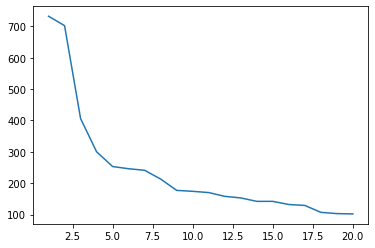

In [309]:
zipf(news_clean)

★ Modify the text generation program in 2.2 further, to do the following tasks:

Store the n most likely words in a list words then randomly choose a word from the list using random.choice(). (You will need to import random first.)
Select a particular genre, such as a section of the Brown Corpus, or a genesis translation, one of the Gutenberg texts, or one of the Web texts. Train the model on this corpus and get it to generate random text. You may have to experiment with different start words. How intelligible is the text? Discuss the strengths and weaknesses of this method of generating random text.
Now train your system using two distinct genres and experiment with generating text in the hybrid genre. Discuss your observations.

In [10]:
def generate_model(text, length = 20, number = 200):
    
    """
    text - generated text will be based on this
    length - what length should b ethe generated text
    number - most frequent N (number) counts wll be extracted from text for text generation
    
    """
    
    freq_words = [w for w, v in most_freq_n(text, n = number)]
    bi_list = list(nltk.bigrams(freq_words))
    bigram_2 = nltk.bigrams(bi_list)
    
    cfd = nltk.ConditionalFreqDist(bigram_2)
    word = random.choice(bi_list)
    
    for i in range(length):
        print(word[0], end=' ')
        word = cfd[word].max()

In [11]:
# Does not make much sense still
generate_model(text2, length = 20, number = 500)

NameError: name 'most_freq_n' is not defined

★ Define a function find_language() that takes a string as its argument, and returns a list of languages that have that string as a word. Use the udhr corpus and limit your searches to files in the Latin-1 encoding.

In [398]:
def find_language(string):
    languages = [file for file in udhr.fileids() if "Latin1" in file]
    candidate_lang = [lang for lang in languages if string in udhr.words(fileids = lang)]
    return candidate_lang

In [399]:
find_language("man")

['Bichelamar-Latin1',
 'Bikol_Bicolano-Latin1',
 'Cakchiquel-Latin1',
 'Chamorro-Latin1',
 'Chuuk_Trukese-Latin1',
 'English-Latin1',
 'Friulian_Friulano-Latin1',
 'Hiligaynon-Latin1',
 'Ibibio_Efik-Latin1',
 'Iloko_Ilocano-Latin1',
 'Kapampangan-Latin1',
 'Kiche_Quiche-Latin1',
 'Luxembourgish_Letzebuergeusch-Latin1',
 'Mam-Latin1',
 'Marshallese-Latin1',
 'NigerianPidginEnglish-Latin1',
 'Sharanahua-Latin1',
 'SolomonsPidgin_Pijin-Latin1',
 'Tiv-Latin1',
 'TokPisin-Latin1',
 'Trukese_Chuuk-Latin1',
 'Waray-Latin1']

In [400]:
Bichelamar = udhr.words(fileids = "Bichelamar-Latin1")
freq_bichelamar = nltk.FreqDist(Bichelamar)
freq_bichelamar["man"]  # let us see how many time it appeared on that language text

53

★ What is the branching factor of the noun hypernym hierarchy? I.e. for every noun synset that has hyponyms — or children in the hypernym hierarchy — how many do they have on average? You can get all noun synsets using wn.all_synsets('n').

In [410]:
nouns = wordnet.all_synsets('n')
nouns_with_hyponyms = [(syn, len(syn.hyponyms())) for syn in nouns if len(syn.hyponyms()) > 0]

In [414]:
sum([count for syn, count in nouns_with_hyponyms])/len(nouns_with_hyponyms)

4.543820763194153

★ The polysemy of a word is the number of senses it has. Using WordNet, we can determine that the noun dog has 7 senses with: len(wn.synsets('dog', 'n')). Compute the average polysemy of nouns, verbs, adjectives and adverbs according to WordNet.

★ Use one of the predefined similarity measures to score the similarity of each of the following pairs of words. Rank the pairs in order of decreasing similarity. How close is your ranking to the order given here, an order that was established experimentally by (Miller & Charles, 1998): 

car-automobile, gem-jewel, journey-voyage, boy-lad, coast-shore, asylum-madhouse, magician-wizard, midday-noon, furnace-stove, food-fruit, bird-cock, bird-crane, tool-implement, brother-monk, lad-brother, crane-implement, journey-car, monk-oracle, cemetery-woodland, food-rooster, coast-hill, forest-graveyard, shore-woodland, monk-slave, coast-forest, lad-wizard, chord-smile, glass-magician, rooster-voyage, noon-string.

In [428]:
dict1 = {"car":"automobile", "gem":"jewel", "journey":"voyage", "boy":"lad", "coast":"shore", "asylum":"madhouse", 
 "magician":"wizard", "midday":"noon", "furnace":"stove", "food":"fruit", "bird":"cock", "bird":"crane", 
 "tool":"implement", "brother":"monk", "lad":"brother", "crane":"implement", "journey":"car", "monk":"oracle", "cemetery":"woodland", 
 "food":"rooster", "coast":"hill", "forest":"graveyard", "shore":"woodland", "monk":"slave", "coast":"forest", "lad":"wizard", "chord":"smile", 
 "glass":"magician", "rooster":"voyage", "noon":"string"}

In [462]:
sims = defaultdict(float)
for w1, w2 in dict1.items():
    sims[(w1, w2)] = wordnet.synsets(w1)[0].path_similarity(wordnet.synsets(w2)[0])

In [466]:
sorted(sims, key = sims.get, reverse = True)

[('car', 'automobile'),
 ('midday', 'noon'),
 ('tool', 'implement'),
 ('boy', 'lad'),
 ('lad', 'wizard'),
 ('monk', 'slave'),
 ('shore', 'woodland'),
 ('magician', 'wizard'),
 ('gem', 'jewel'),
 ('asylum', 'madhouse'),
 ('brother', 'monk'),
 ('bird', 'crane'),
 ('cemetery', 'woodland'),
 ('glass', 'magician'),
 ('crane', 'implement'),
 ('coast', 'forest'),
 ('chord', 'smile'),
 ('furnace', 'stove'),
 ('forest', 'graveyard'),
 ('food', 'rooster'),
 ('noon', 'string'),
 ('journey', 'car'),
 ('rooster', 'voyage')]